In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Exercises for Wednesday
***
# Exercise 1 : Digits dataset

Using the `load_digits` function from sklearn, load the dataset and visualize how the dataset is built.

In [2]:
# Your code here
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
y = digits.target

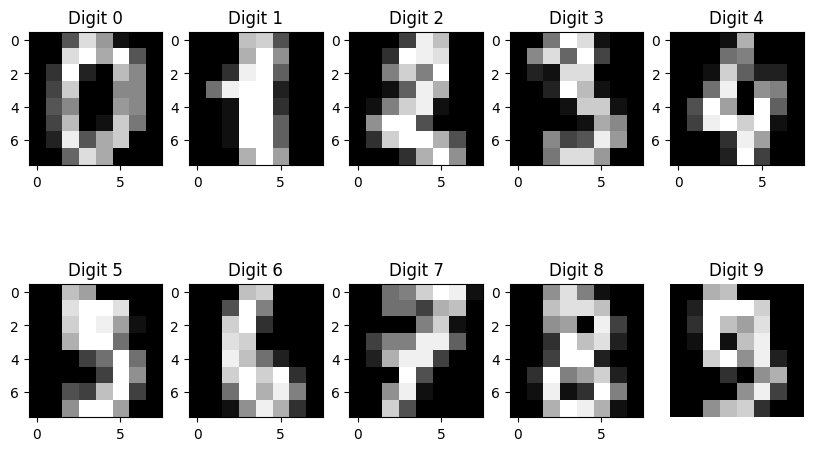

In [3]:
# PLot the first 10 images
fig, axs = plt.subplots(2, 5, figsize=(10, 6))
for i in range(10):
    axs[i // 5, i % 5].imshow(X[i].reshape(8, 8), cmap='gray')
    axs[i // 5, i % 5].set_title(f'Digit {y[i]}')
    plt.axis('off')
plt.show()

Train a Logostic Regression model from sklearn and visualize the performances of this model on the classification task.

**NB :** we are facing MULTICLASS classification task ;)

In [4]:
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LogisticRegression(multi_class = 'multinomial', 
                           solver = 'lbfgs', 
                           max_iter = 1000, 
                           random_state = 42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



/opt/miniconda3/envs/ada/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


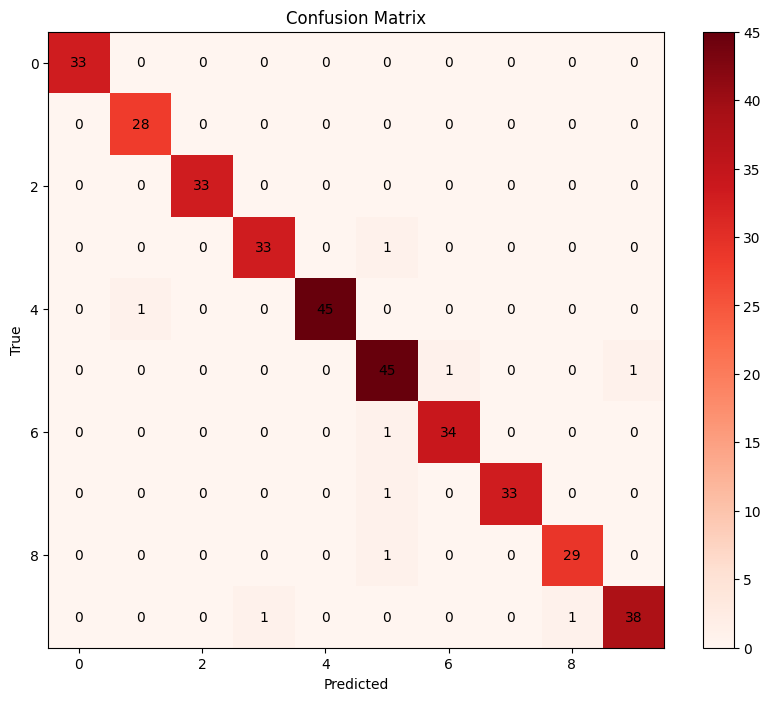

In [5]:
# Build a confusion matrix where each cell contains the number of true positives 
# for column class against the row class.
# Your code here
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap='Reds')
# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        text = plt.text(j, i, cm[i, j],
                       ha="center", va="center", color="k")
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Did you cross-validate the solver ?

In [6]:
# Your code here

***
# Exercise 2 : Support Vector Machine models

Still using the `load_digits` dataset, validate the kernel and train a SVM model to fit the data.

In [7]:
# Your code here
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

hyperparameters = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                   'C': [0.1, 0.5, 1, 5, 10, 100]}

svm = SVC()

grid_search = GridSearchCV(svm, 
                           hyperparameters, 
                           cv = 4,
                           scoring = 'accuracy',
                           verbose = 2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


Fitting 4 folds for each of 24 candidates, totalling 96 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1,

In [8]:
# Train a SVM model with the best parameters
svm = SVC(kernel = grid_search.best_params_['kernel'],
          C = grid_search.best_params_['C'])
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



***
# Exercise 3 : Load diabetes

Same question with SVR model but on `load_diabetes` dataset.

In [9]:
# Load dataset
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

hyperparameters = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                   'C': [0.1, 0.5, 1, 5, 10, 100]}

model = SVR()
grid_search = GridSearchCV(model, 
                           hyperparameters, 
                           cv = 4,
                           scoring = 'neg_root_mean_squared_error',
                           verbose = 2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1,

In [12]:
# Train the model with the best parameters
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

model = SVR(kernel = grid_search.best_params_['kernel'],
            C = grid_search.best_params_['C'])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"R2: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")


R2: 0.4467619535349231
MAE: 43.316551963341496
RMSE: 54.13999559683077
MAPE: 0.375304793822694
